## Toy perceptron


In [1]:
import torch
import torch.nn as nn

In [2]:
# define "perceptron"
# a network that takes two input 'units' and produces a single output 'unit'
perceptron = nn.Linear(2, 1)  
perceptron

Linear(in_features=2, out_features=1, bias=True)

In [3]:
?nn.Linear

In [4]:
perceptron = list(perceptron.parameters())  # returns weights and biases
perceptron

[Parameter containing:
 tensor([[0.1968, 0.6905]], requires_grad=True), Parameter containing:
 tensor([-0.4861], requires_grad=True)]

In [5]:
# We have as many weights as we have input units
print('Perceptron Weights : ', perceptron[0][0].data.numpy())

Perceptron Weights :  [0.19683303 0.69049096]


In [6]:
# Q: How many bias terms would we have if we double the size of the input units? 
print('Perceptron Bias :', perceptron[1].data.numpy())

Perceptron Bias : [-0.48610717]


## Input data 

In [11]:
import torch
import torch.nn as nn

# create data
# start creating the the table for XOR, broken down in Xs and y
Xs = torch.Tensor([[0., 0.],
                   [0., 1.],
                   [1., 0.],
                   [1., 1.]])

y = torch.Tensor([0, 1, 1, 0]).reshape(Xs.shape[0], 1)
# Q: do you remember the tables for y = AND, y = OR? 
#   how would you represent them? 

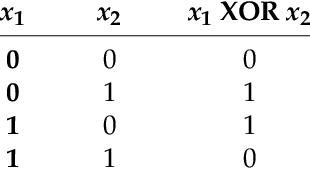

In [12]:
# Check out this this distinction, sometimes we do need singleton dimensions 
# this is a mild-annoyance from PyTorch's syntax 
torch.Tensor([1., 1., 1., 1.]).shape, y.shape

(torch.Size([4]), torch.Size([4, 1]))

In [13]:
Xs

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [14]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [15]:
?nn.Sigmoid()

Object `nn.Sigmoid()` not found.


In [16]:
??nn.ReLU()

Object `nn.ReLU()` not found.


## Create Multilayer Perceptron to Compute XOR, AND, OR 

In [24]:
# LOGIC is a subclass of nn.Module
class LOGIC(nn.Module):
    def __init__(self):
        # here we define the network architecture 
        super(LOGIC, self).__init__()
        #nn.Linear is a fully connected layer
        self.linear = nn.Linear(2, 2)
        # nn.Sigmoid is a sigmoid activation
        # Q: which activations functions can we use? 
        self.activation_function = nn.ReLU()
        self.linear2 = nn.Linear(2, 1)
    # here we define the forward pass    
    def forward(self, input):
        x = self.linear(input)
        activation = self.activation_function(x)
        # Q: what happens if we skip the sigmoid (or ReLU)? Try feeding x to the next function. 
        yh = self.linear2(activation)
        # Q: what happens if we return activation instead of yh? 
        return yh

In [26]:
logic_network = LOGIC()
# Q: what is an epoch? 
epochs = 1000 
mseloss = nn.MSELoss() 
# The optimizer will perform gradient descent using the network's weights 
# and a given learning rate
optimizer = torch.optim.Adam(logic_network.parameters(), lr = 0.03) 
all_losses = [] 
current_loss = 0 
print_every = 50 
 
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = logic_network.forward(Xs)
    
    # calculate Mean Squared Error loss of our prediction  
    loss = mseloss(yhat, y)
      
    # backpropagate to obtain all gradients in the weight layers  
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # import pdb; pdb.set_trace()
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % print_every == 0:       
        all_losses.append(current_loss / print_every)       
        current_loss = 0 
     
    # print progress   
    if epoch % 500 == 0:     
        print(f'Epoch: {epoch} completed')




Epoch: 0 completed
Epoch: 500 completed


In [27]:
all_losses

[tensor(0.0052, grad_fn=<DivBackward0>),
 tensor(0.2504, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>),
 tensor(0.2500, grad_fn=<DivBackward0>)]

In [28]:
# test input
input = torch.tensor([0., 0.])
out = logic_network(input)
out.round()

tensor([0.], grad_fn=<RoundBackward0>)

In [29]:
input = torch.tensor([1., 1.])
out = logic_network(input)
out.round()

tensor([0.], grad_fn=<RoundBackward0>)

In [30]:
input = torch.tensor([0., 1.])
out = logic_network(input)
out.round()

tensor([0.], grad_fn=<RoundBackward0>)

In [31]:
input = torch.tensor([1., 0.])
out = logic_network(input)
out.round()

tensor([0.], grad_fn=<RoundBackward0>)

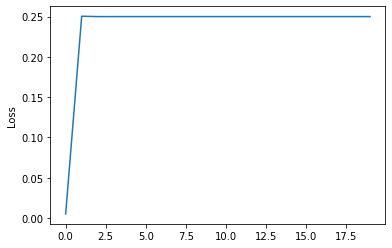

In [32]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(all_losses)
  plt.ylabel('Loss')
  plt.show()